# Organización de Datos (75.06/95.58)
## Primer Cuatrimestre 2021
### Trabajo Práctico N°1
#### Curso 1: Argerich

----

##### Introducción:
En el año 2015 Nepal fue afectado por el terremoto Gorkha, un sismo que registró una
magnitud de 7.8 en la escala Richter y tuvo su epicentro en la ciudad de Kathmandu.
Aproximadamente 600,000 estructuras en el centro y pueblos aledaños fueron dañadas o
destruidas. Un análisis posterior al sismo llevado por la Comisión Nacional de
Planeamiento de Nepal comunicó que la pérdida total económica ocasionada por el
terremoto fue de aproximadamente $7 mil millones (USD; NPC, 2015).
El dataset para el presente TP está compuesto de encuestas realizadas por Kathmandu
Living Labs y el Central Bureau of Statistics y contiene información sobre el impacto del
terremoto, estado de viviendas y estadísticas sociodemográficas.
Particularmente el dataset se enfoca en cómo eran las condiciones de una determinada vivienda y cuál fue su grado de daño luego del accidente. 

##### Objetivo:
El TP consiste en realizar un análisis exploratorio de los datos provistos con el objetivo de
determinar características y variables importantes, descubrir insights interesantes, y
analizar la estructura de los mismos.

# Analisis exploratorio de los datos
#### Empecemos importando los recursos necesarios

In [18]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# lectura de archivos csv
train_values=pd.read_csv('train_values.csv')
train_labels=pd.read_csv('train_labels.csv')

### Limpieza de datos
- ¿Hay datos faltantes?
    - ¿Son muchos? Caso contrario podriamos simplemente filtrarlos.
- ¿Todos los datos estan con el formato correcto?
    - ¿Es necesario transformar alguna columna a tipo categórico/numérico/date_time?
- ¿Los dataframes son muy grandes?
    - ¿Es necesario algun trabajo previo para minimizar el espacio en memoria?
- ¿Hay datos que no tengan sentido?
    - Cuyos valores sean muy grandes para el contexto
    - Que no sean posibles

#### Reviso valores null en mis dataframes

In [20]:
train_labels.isnull().any()

building_id     False
damage_grade    False
dtype: bool

In [21]:
train_values.isnull().any()

building_id                               False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

Podemos ver que, por suerte, **ninguno de los dataframes contienen valores NaN.**  
Esto quiere decir que no será necesario ningún tipo de filtro en los datasets a causa de valores faltantes.

#### Chequeando formato de los datos

#### Manejo de memoria del dataset

#### Buscando datos fuera de lo común

In [22]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


## Analisis por región geográfica

Tenemos 3 grados de daño posibles. Primero analizamos cuantas edificaciones fueron afectadas para cada uno de estos grados de daño sin discriminar por región geográfica.

<AxesSubplot:>

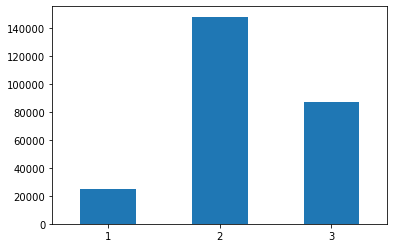

In [24]:
general_damage = train_labels['damage_grade'].value_counts(sort=False)
general_damage.plot(kind='bar', rot=0)

En el siguiente gráfico vemos que las edificaciones no estan distribuidas uniformemente en las regiones indicadas en *geo_level_1_id*

Text(0.5, 0, 'Region')

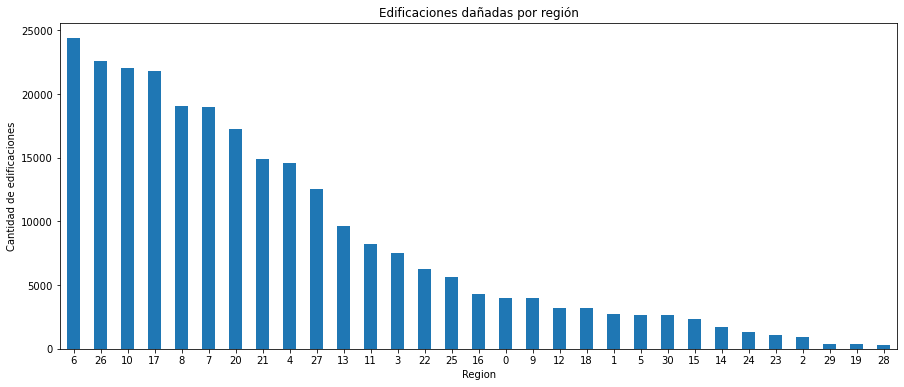

In [102]:
train=train_values.merge(train_labels)
train['geo_level_1_id'].value_counts().plot(kind='bar', figsize=(15,6), rot=0, title='Edificaciones dañadas por región')
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones')
ax.set_xlabel('Region')

<AxesSubplot:>

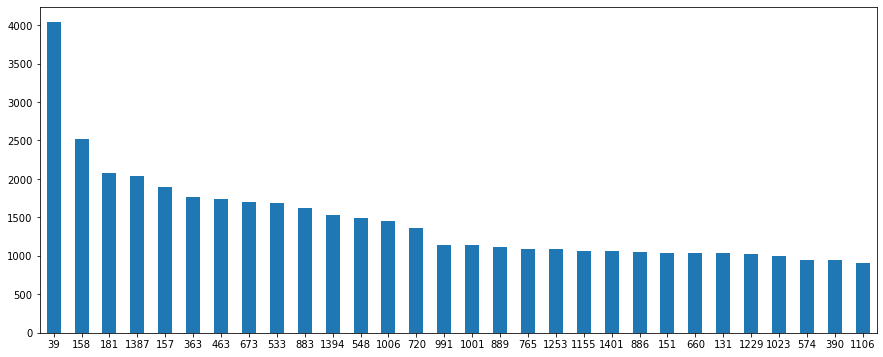

In [101]:
train['geo_level_2_id'].value_counts().nlargest(30).plot(kind='bar', figsize=(15,6), rot=0)

Text(0.5, 0, 'Region')

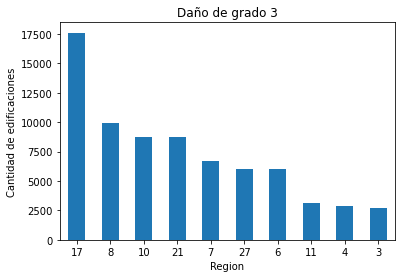

In [103]:
geo_level_1_damage_3=train.loc[train['damage_grade']==3, 'geo_level_1_id'].value_counts().nlargest(10)
geo_level_1_damage_3.plot(kind='bar', rot=0, title='Daño de grado 3')
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones')
ax.set_xlabel('Region')

Vemos que la región 17 tuvo muchas edificaciones fue recibieron un daño de grado 3.

<AxesSubplot:xlabel='geo_level_1_id'>

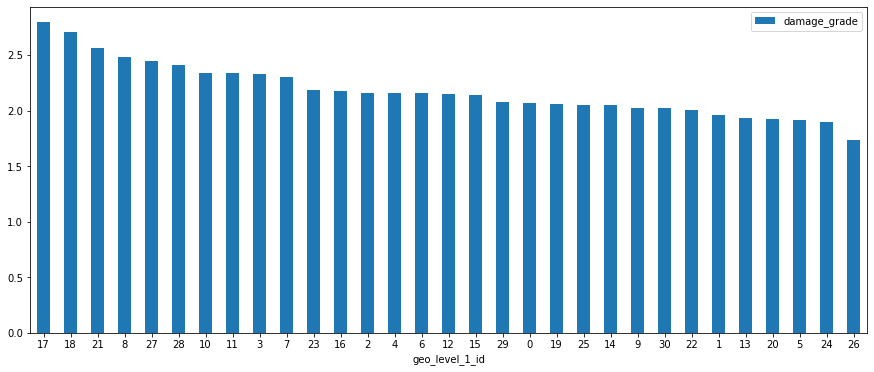

In [90]:
train[['geo_level_1_id','damage_grade']].groupby('geo_level_1_id').agg('mean').sort_values(by='damage_grade', ascending=False).plot(kind='bar', figsize=(15,6), rot=0)

## Analisis por cantidad de pisos 
Existe una relación entre la cantidad de pisos que tiene un edificio y el daño que recibio?

In [27]:
train_values.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

<AxesSubplot:>

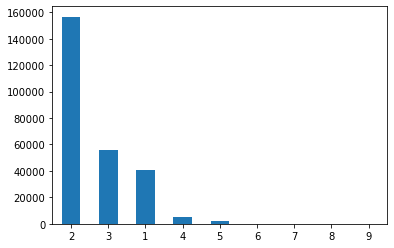

In [105]:
# train.loc[train['count_floors_pre_eq']]
train['count_floors_pre_eq'].value_counts().nlargest(10).plot(kind='bar', rot=0)

<AxesSubplot:xlabel='count_floors_pre_eq'>

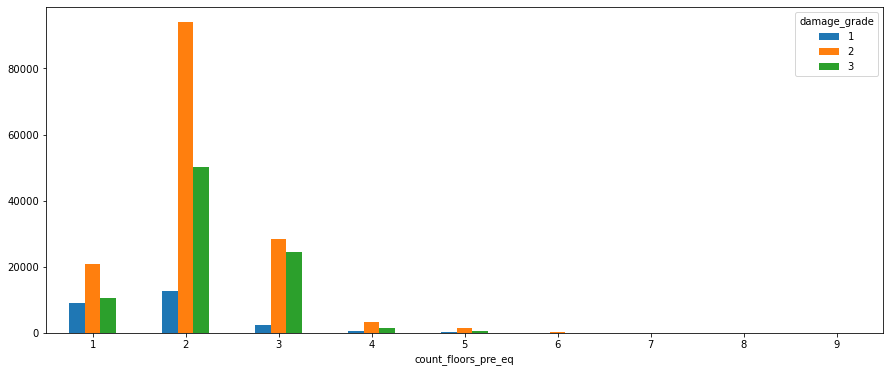

In [137]:
train[['count_floors_pre_eq', 'damage_grade']].value_counts().to_frame().rename(columns={0:'value_counts'}).pivot_table(index='count_floors_pre_eq', columns='damage_grade', values='value_counts').plot(kind='bar', figsize=(15,6), rot=0)